In [10]:
import pandas as pd
import matplotlib.pyplot as plt 
# Font settings
plt.rcParams['font.size'] = 12                # Default font size for text
plt.rcParams['font.family'] = 'serif'         # Font family for text

# Figure settings
plt.rcParams['figure.figsize'] = (8, 6)       # Default figure size (width, height in inches)
plt.rcParams['figure.dpi'] = 100              # Resolution of the figure in dots per inch

# Axes settings
plt.rcParams['axes.grid'] = True              # Turn on/off gridlines by default
plt.rcParams['axes.titlesize'] = 20           # Font size of the plot titles
plt.rcParams['axes.labelsize'] = 16           # Font size of the x and y labels
plt.rcParams['axes.linewidth'] = 1.5          # Line width of the axes

# Tick settings
plt.rcParams['xtick.labelsize'] = 12          # Font size for x-axis tick labels
plt.rcParams['ytick.labelsize'] = 12          # Font size for y-axis tick labels
plt.rcParams['xtick.major.size'] = 6          # Size of major ticks on x-axis
plt.rcParams['ytick.major.size'] = 6          # Size of major ticks on y-axis

# Line settings
plt.rcParams['lines.linewidth'] = 2.0         # Line width for plot lines
plt.rcParams['lines.markersize'] = 6          # Marker size for plot markers

# Legend settings
plt.rcParams['legend.fontsize'] = 12          # Font size for legend text
plt.rcParams['legend.loc'] = 'best'           # Default location for legends

# Save settings
plt.rcParams['savefig.dpi'] = 300             # DPI for saved figures
plt.rcParams['savefig.bbox'] = 'tight'        # Adjust layout when saving figures

# Grid settings
plt.rcParams['grid.color'] = 'gray'           # Color of gridlines
plt.rcParams['grid.linestyle'] = '--'         # Line style for gridlines
plt.rcParams['grid.linewidth'] = 0.5          # Line width for gridlines
# import seaborn as sns
from scipy import stats

---

## DEWDROP 100 vs Random 100

In [11]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from scipy import stats
import os
import matplotlib
matplotlib.rcParams.update({'font.size': 15})

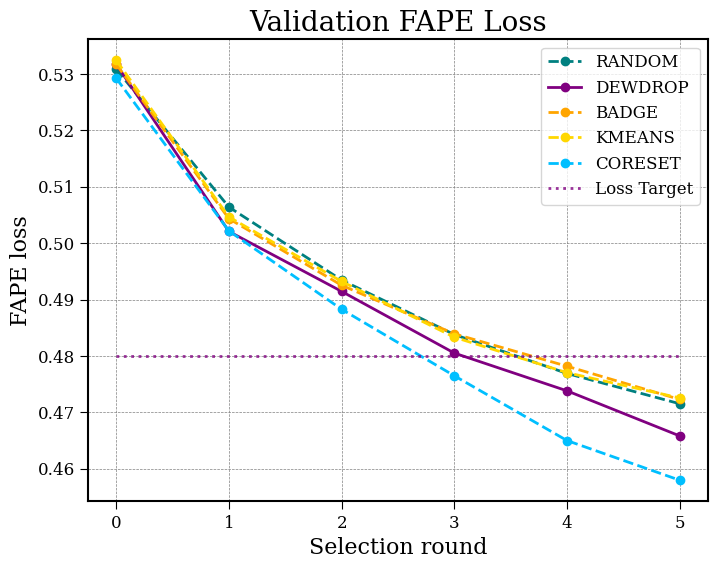

In [12]:
trial_num = 3
batch_num = 5 
batch_idx = 0
version_idx_dewdrop, version_idx_random, version_idx_badge, version_idx_kmeans, version_idx_coreset = 4, 1, 1, 1, 1
target_loss_column = 'val_loss_fape_final'
dewdropfp_template = "/mount/UDS-ActiveLearning-Equifold/model_logs/dewdrop/dewdrop_bs=100_batches={batch_idx}/v{version_idx_dewdrop}/metrics.csv"
randomfp_template = "/mount/UDS-ActiveLearning-Equifold/model_logs/random_selection/random_selection_batches={batch_idx}/v{version_idx_random}/metrics.csv"
badgefp_template = "/mount/UDS-ActiveLearning-Equifold/model_logs/badge/badge_bs=100_batches={batch_idx}/v{version_idx_badge}/metrics.csv"
kmeansfp_template = "/mount/UDS-ActiveLearning-Equifold/model_logs/kmeans/kmeans_bs=100_batches={batch_idx}/v{version_idx_kmeans}/metrics.csv"
coresetfp_template = "/mount/UDS-ActiveLearning-Equifold/model_logs/coreset/coreset_bs=100_batches={batch_idx}/v{version_idx_coreset}/metrics.csv"

dewdrop_trials, random_trials, badge_trials, kmeans_trials, coreset_trials = [], [], [], [], []
for t in range(trial_num):
    batch_idx = 0
    dewdrop_trials.append([])
    random_trials.append([])
    badge_trials.append([])
    kmeans_trials.append([])
    coreset_trials.append([])
    for b in range(batch_num+1): 
        dewdropfp = dewdropfp_template.format(batch_idx=batch_idx, version_idx_dewdrop=version_idx_dewdrop)
        randomfp = randomfp_template.format(batch_idx=batch_idx, version_idx_random=version_idx_random)
        badgefp = badgefp_template.format(batch_idx=batch_idx, version_idx_badge=version_idx_badge)
        kmeansfp = kmeansfp_template.format(batch_idx=batch_idx, version_idx_kmeans=version_idx_kmeans)
        coresetfp = coresetfp_template.format(batch_idx=batch_idx, version_idx_coreset=version_idx_coreset)
        if os.path.exists(dewdropfp):
            dewdrop_trials[t].append(pd.read_csv(dewdropfp)[target_loss_column].dropna().to_list())
        if os.path.exists(randomfp): 
            random_trials[t].append(pd.read_csv(randomfp)[target_loss_column].dropna().to_list())
        if os.path.exists(badgefp): 
            badge_trials[t].append(pd.read_csv(badgefp)[target_loss_column].dropna().to_list())
        if os.path.exists(kmeansfp): 
            kmeans_trials[t].append(pd.read_csv(kmeansfp)[target_loss_column].dropna().to_list())
        if os.path.exists(coresetfp): 
            coreset_trials[t].append(pd.read_csv(coresetfp)[target_loss_column].dropna().to_list())
        batch_idx += 1
    version_idx_dewdrop += 1
    version_idx_random += 1
    version_idx_badge += 1
    version_idx_kmeans += 1
    version_idx_coreset += 1
    
# get the min valloss from each trials
dewdrop_val_fape_losses = []
random_val_fape_losses = []
badge_val_fape_losses = []
kmeans_val_fape_losses = []
coreset_val_fape_losses = []
for dewdrop_t, random_t, badge_t, kmeans_t, coreset_t in zip(dewdrop_trials, random_trials, badge_trials, kmeans_trials, coreset_trials):
    dewdrop_val_fape_losses.append([np.min(loss_b) for loss_b in dewdrop_t])
    random_val_fape_losses.append([np.min(loss_b) for loss_b in random_t])
    badge_val_fape_losses.append([np.min(loss_b) for loss_b in badge_t])
    kmeans_val_fape_losses.append([np.min(loss_b) for loss_b in kmeans_t])
    coreset_val_fape_losses.append([np.min(loss_b) for loss_b in coreset_t])

max_dewdrop_batchnum = max([len(loss) for loss in dewdrop_val_fape_losses])
dewdrop_val_fape_losses_avg = []
for b in range(max_dewdrop_batchnum): 
    dewdrop_val_fape_losses_avg.append(np.mean([dewdrop_val_fape_losses[t][b] for t in range(trial_num) if b < len(dewdrop_val_fape_losses[t])]))
max_random_batchnum = max([len(loss) for loss in random_val_fape_losses])
random_val_fape_losses_avg = []
for b in range(max_random_batchnum): 
    random_val_fape_losses_avg.append(np.mean([random_val_fape_losses[t][b] for t in range(trial_num) if b < len(random_val_fape_losses[t])]))
max_badge_batchnum = max([len(loss) for loss in badge_val_fape_losses])
badge_val_fape_losses_avg = []
for b in range(max_badge_batchnum): 
    badge_val_fape_losses_avg.append(np.mean([badge_val_fape_losses[t][b] for t in range(trial_num) if b < len(badge_val_fape_losses[t])]))
max_kmeans_batchnum = max([len(loss) for loss in kmeans_val_fape_losses])
kmeans_val_fape_losses_avg = []
for b in range(max_kmeans_batchnum): 
    kmeans_val_fape_losses_avg.append(np.mean([kmeans_val_fape_losses[t][b] for t in range(trial_num) if b < len(kmeans_val_fape_losses[t])]))
max_coreset_batchnum = max([len(loss) for loss in coreset_val_fape_losses])
coreset_val_fape_losses_avg = []
for b in range(max_coreset_batchnum): 
    coreset_val_fape_losses_avg.append(np.mean([coreset_val_fape_losses[t][b] for t in range(trial_num) if b < len(coreset_val_fape_losses[t])]))    

plt.figure(figsize=(8, 6))
plt.title("Validation FAPE Loss")
plt.xlabel("Selection round")
plt.ylabel("FAPE loss")
# plot random 
plt.plot(random_val_fape_losses_avg, color="#008080", marker='o', linestyle='dashed', label='RANDOM')

# plot dewdrop
plt.plot(dewdrop_val_fape_losses_avg, color="purple", marker='o', label='DEWDROP')

# plot badge 
plt.plot(badge_val_fape_losses_avg, color='#FFA500', marker='o', linestyle='dashed', label='BADGE')

# plot kmeans
plt.plot(kmeans_val_fape_losses_avg, color='#FFD700', marker='o', linestyle='dashed', label='KMEANS')

# plot coreset
plt.plot(coreset_val_fape_losses_avg, color='#00BFFF', marker='o', linestyle='dashed', label='CORESET')

# plot horizontal loss threshold 
plt.hlines(y=0.48, xmin=0, xmax=5, colors='purple', alpha=0.8, linestyle='dotted', label="Loss Target")
plt.legend()
plt.savefig("graphs/compare_fape_loss.png")


In [13]:
trial_num = 3
batch_num = 5 
batch_idx = 0
version_idx_dewdrop, version_idx_random, version_idx_badge, version_idx_kmeans, version_idx_coreset = 4, 1, 1, 1, 1
target_loss_column = 'val_loss_fape_final'
dewdropfp_template = "/mount/UDS-ActiveLearning-Equifold/model_logs/dewdrop/dewdrop_bs=100_batches={batch_idx}/v{version_idx_dewdrop}/metrics.csv"
randomfp_template = "/mount/UDS-ActiveLearning-Equifold/model_logs/random_selection/random_selection_batches={batch_idx}/v{version_idx_random}/metrics.csv"
badgefp_template = "/mount/UDS-ActiveLearning-Equifold/model_logs/badge/badge_bs=100_batches={batch_idx}/v{version_idx_badge}/metrics.csv"
kmeansfp_template = "/mount/UDS-ActiveLearning-Equifold/model_logs/kmeans/kmeans_bs=100_batches={batch_idx}/v{version_idx_kmeans}/metrics.csv"
coresetfp_template = "/mount/UDS-ActiveLearning-Equifold/model_logs/coreset/coreset_bs=100_batches={batch_idx}/v{version_idx_coreset}/metrics.csv"

dewdrop_trials, random_trials, badge_trials, kmeans_trials, coreset_trials = [], [], [], [], []
for t in range(trial_num):
    batch_idx = 0
    dewdrop_trials.append([])
    random_trials.append([])
    badge_trials.append([])
    kmeans_trials.append([])
    coreset_trials.append([])
    for b in range(batch_num+1): 
        dewdropfp = dewdropfp_template.format(batch_idx=batch_idx, version_idx_dewdrop=version_idx_dewdrop)
        randomfp = randomfp_template.format(batch_idx=batch_idx, version_idx_random=version_idx_random)
        badgefp = badgefp_template.format(batch_idx=batch_idx, version_idx_badge=version_idx_badge)
        kmeansfp = kmeansfp_template.format(batch_idx=batch_idx, version_idx_kmeans=version_idx_kmeans)
        coresetfp = coresetfp_template.format(batch_idx=batch_idx, version_idx_coreset=version_idx_coreset)
        if os.path.exists(dewdropfp):
            dewdrop_trials[t].append(pd.read_csv(dewdropfp)[target_loss_column].dropna().to_list())
        if os.path.exists(randomfp): 
            random_trials[t].append(pd.read_csv(randomfp)[target_loss_column].dropna().to_list())
        if os.path.exists(badgefp): 
            badge_trials[t].append(pd.read_csv(badgefp)[target_loss_column].dropna().to_list())
        if os.path.exists(kmeansfp): 
            kmeans_trials[t].append(pd.read_csv(kmeansfp)[target_loss_column].dropna().to_list())
        if os.path.exists(coresetfp): 
            coreset_trials[t].append(pd.read_csv(coresetfp)[target_loss_column].dropna().to_list())
        batch_idx += 1
    version_idx_dewdrop += 1
    version_idx_random += 1
    version_idx_badge += 1
    version_idx_kmeans += 1
    version_idx_coreset += 1
    
# get the min valloss from each trials
dewdrop_val_fape_losses = []
random_val_fape_losses = []
badge_val_fape_losses = []
kmeans_val_fape_losses = []
coreset_val_fape_losses = []
for dewdrop_t, random_t, badge_t, kmeans_t, coreset_t in zip(dewdrop_trials, random_trials, badge_trials, kmeans_trials, coreset_trials):
    dewdrop_val_fape_losses.append([np.min(loss_b) for loss_b in dewdrop_t])
    random_val_fape_losses.append([np.min(loss_b) for loss_b in random_t])
    badge_val_fape_losses.append([np.min(loss_b) for loss_b in badge_t])
    kmeans_val_fape_losses.append([np.min(loss_b) for loss_b in kmeans_t])
    coreset_val_fape_losses.append([np.min(loss_b) for loss_b in coreset_t])

print(coreset_val_fape_losses)

[[0.5296889543533325, 0.5035680532455444, 0.4887475967407226, 0.4781572222709656, 0.4673193097114563, 0.4576795399188995], [0.529186487197876, 0.5021594166755676, 0.4893159866333008, 0.476622074842453, 0.4635905623435974, 0.4585976898670196], [0.5289051532745361, 0.5007831454277039, 0.4867294430732727, 0.4746309220790863, 0.464032769203186, 0.4575627446174621]]


In [14]:
max_dewdrop_batchnum = max([len(loss) for loss in dewdrop_val_fape_losses])
dewdrop_val_fape_losses_avg = []
for b in range(max_dewdrop_batchnum): 
    dewdrop_val_fape_losses_avg.append(np.mean([dewdrop_val_fape_losses[t][b] for t in range(trial_num) if b < len(dewdrop_val_fape_losses[t])]))
dewdrop_val_fape_losses_avg

[0.5317433079083761,
 0.5020771423975626,
 0.4914439916610718,
 0.4804992079734802,
 0.4738009174664815,
 0.4658009111881256]

In [15]:
fp = "/mount/UDS-ActiveLearning-Equifold/model_logs/coreset/coreset_bs=100_batches=0/v1/metrics.csv"
np.min(pd.read_csv(fp)['val_loss_fape_final'])

0.5296889543533325

In [16]:
fp2 = "/mount/UDS-ActiveLearning-Equifold/model_logs/coreset/coreset_bs=100_batches=1/v1/metrics.csv"
np.min(pd.read_csv(fp2)['val_loss_fape_final'])

0.5035680532455444

In [17]:
trial_num = 1
batch_num = 5 
batch_idx = 0
version_idx_coreset = 1
target_loss_column = 'val_loss'
coresetfp_template = "/mount/UDS-ActiveLearning-Equifold/model_logs/coreset/coreset_bs=100_batches={batch_idx}/v{version_idx_coreset}/metrics.csv"

coreset_trials = []
for t in range(trial_num):
    batch_idx = 0
    coreset_trials.append([])
    for b in range(batch_num+1): 
        coresetfp = coresetfp_template.format(batch_idx=batch_idx, version_idx_coreset=version_idx_coreset)
        if os.path.exists(coresetfp): 
            coreset_trials[t].append(pd.read_csv(coresetfp)[target_loss_column].dropna().to_list())
        batch_idx += 1
    version_idx_coreset += 1
    
# get the min valloss from each trials
coreset_val_losses = []
for coreset_t in coreset_trials:
    coreset_val_losses.append([np.min(loss_b) for loss_b in coreset_t])

max_coreset_batchnum = max([len(loss) for loss in coreset_val_losses])
coreset_val_losses_avg = []
for b in range(max_coreset_batchnum): 
    coreset_val_losses_avg.append(np.mean([coreset_val_losses[t][b] for t in range(trial_num) if b < len(coreset_val_losses[t])]))  

coreset_val_losses_avg

[0.607699979385287,
 0.5727080628081851,
 0.5547696172232152,
 0.5443861725554214,
 0.5341538367408607,
 0.5244171050035713]

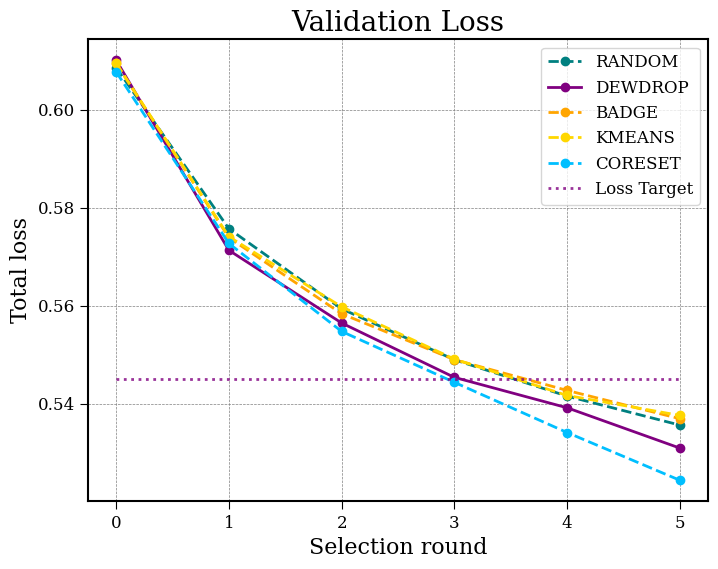

In [18]:
trial_num = 3
batch_num = 5 
batch_idx = 0
version_idx_dewdrop, version_idx_random, version_idx_badge, version_idx_kmeans = 4, 1, 1, 1
target_loss_column = 'val_loss'
dewdropfp_template = "/mount/UDS-ActiveLearning-Equifold/model_logs/dewdrop/dewdrop_bs=100_batches={batch_idx}/v{version_idx_dewdrop}/metrics.csv"
randomfp_template = "/mount/UDS-ActiveLearning-Equifold/model_logs/random_selection/random_selection_batches={batch_idx}/v{version_idx_random}/metrics.csv"
badgefp_template = "/mount/UDS-ActiveLearning-Equifold/model_logs/badge/badge_bs=100_batches={batch_idx}/v{version_idx_badge}/metrics.csv"
kmeansfp_template = "/mount/UDS-ActiveLearning-Equifold/model_logs/kmeans/kmeans_bs=100_batches={batch_idx}/v{version_idx_badge}/metrics.csv"
coresetfp_template = "/mount/UDS-ActiveLearning-Equifold/model_logs/coreset/coreset_bs=100_batches={batch_idx}/v{version_idx_coreset}/metrics.csv"

dewdrop_trials, random_trials, badge_trials, kmeans_trials, coreset_trials = [], [], [], [], []
for t in range(trial_num):
    batch_idx = 0
    dewdrop_trials.append([])
    random_trials.append([])
    badge_trials.append([])
    kmeans_trials.append([])
    coreset_trials.append([])
    for b in range(batch_num+1): 
        dewdropfp = dewdropfp_template.format(batch_idx=batch_idx, version_idx_dewdrop=version_idx_dewdrop)
        randomfp = randomfp_template.format(batch_idx=batch_idx, version_idx_random=version_idx_random)
        badgefp = badgefp_template.format(batch_idx=batch_idx, version_idx_badge=version_idx_badge)
        kmeansfp = kmeansfp_template.format(batch_idx=batch_idx, version_idx_badge=version_idx_badge)
        if os.path.exists(dewdropfp):
            dewdrop_trials[t].append(pd.read_csv(dewdropfp)[target_loss_column].dropna().to_list())
        if os.path.exists(randomfp): 
            random_trials[t].append(pd.read_csv(randomfp)[target_loss_column].dropna().to_list())
        if os.path.exists(badgefp): 
            badge_trials[t].append(pd.read_csv(badgefp)[target_loss_column].dropna().to_list())
        if os.path.exists(kmeansfp): 
            kmeans_trials[t].append(pd.read_csv(kmeansfp)[target_loss_column].dropna().to_list())
        if os.path.exists(coresetfp): 
            coreset_trials[t].append(pd.read_csv(coresetfp)[target_loss_column].dropna().to_list())
        batch_idx += 1
    version_idx_dewdrop += 1
    version_idx_random += 1
    version_idx_badge += 1
    version_idx_kmeans += 1
    version_idx_coreset += 1

# get the min valloss from each trials
dewdrop_val_losses = []
random_val_losses = []
badge_val_losses = []
kmeans_val_losses = []
coreset_val_losses = []
for dewdrop_t, random_t, badge_t, kmeans_t, coreset_t in zip(dewdrop_trials, random_trials, badge_trials, kmeans_trials, coreset_trials):
    dewdrop_val_losses.append([np.min(loss_b) for loss_b in dewdrop_t])
    random_val_losses.append([np.min(loss_b) for loss_b in random_t])
    badge_val_losses.append([np.min(loss_b) for loss_b in badge_t])
    kmeans_val_losses.append([np.min(loss_b) for loss_b in kmeans_t])
    coreset_val_losses.append([np.min(loss_b) for loss_b in coreset_t])

max_dewdrop_batchnum = max([len(loss) for loss in dewdrop_val_losses])
dewdrop_val_losses_avg = []
for b in range(max_dewdrop_batchnum): 
    dewdrop_val_losses_avg.append(np.mean([dewdrop_val_losses[t][b] for t in range(trial_num) if b < len(dewdrop_val_losses[t])]))
max_random_batchnum = max([len(loss) for loss in random_val_losses])
random_val_losses_avg = []
for b in range(max_random_batchnum): 
    random_val_losses_avg.append(np.mean([random_val_losses[t][b] for t in range(trial_num) if b < len(random_val_losses[t])]))
max_badge_batchnum = max([len(loss) for loss in badge_val_losses])
badge_val_losses_avg = []
for b in range(max_badge_batchnum): 
    badge_val_losses_avg.append(np.mean([badge_val_losses[t][b] for t in range(trial_num) if b < len(badge_val_losses[t])]))
kmeans_val_losses_avg = []
for b in range(max_kmeans_batchnum): 
    kmeans_val_losses_avg.append(np.mean([kmeans_val_losses[t][b] for t in range(trial_num) if b < len(kmeans_val_losses[t])]))
# coreset_val_losses_avg = []
# for b in range(max_coreset_batchnum): 
#     coreset_val_losses_avg.append(np.mean([coreset_val_losses[t][b] for t in range(trial_num) if b < len(coreset_val_losses[t])]))    
    
plt.figure(figsize=(8, 6))
plt.title("Validation Loss")
plt.xlabel("Selection round")
plt.ylabel("Total loss")
# plot random 
plt.plot(random_val_losses_avg, color="#008080", marker='o', linestyle='dashed', label='RANDOM')

# plot dewdrop
plt.plot(dewdrop_val_losses_avg, color="purple", marker='o', label='DEWDROP')

# plot badge 
plt.plot(badge_val_losses_avg, color='#FFA500', marker='o', linestyle='dashed', label='BADGE')

# plot kmeans
plt.plot(kmeans_val_losses_avg, color='#FFD700', marker='o', linestyle='dashed', label='KMEANS')

# plot coreset
plt.plot(coreset_val_losses_avg, color='#00BFFF', marker='o', linestyle='dashed', label='CORESET')

# plot horizontal loss threshold 
plt.hlines(y=0.545, xmin=0, xmax=5, colors='purple', alpha=0.8, linestyle='dotted', label="Loss Target")
plt.legend()
plt.savefig("graphs/compare_loss.png")


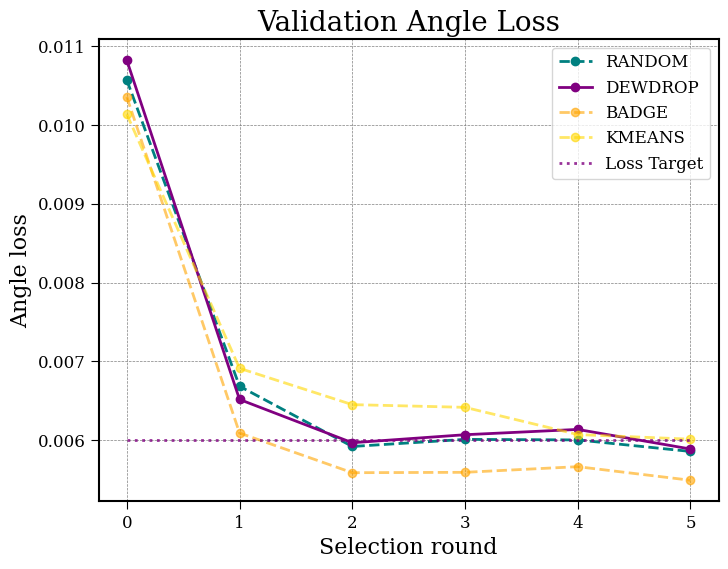

In [19]:
trial_num = 3
batch_num = 5 
batch_idx = 0
version_idx_dewdrop, version_idx_random, version_idx_badge, version_idx_kmeans = 4, 1, 1, 1
target_loss_column = 'val_loss_angle_final'
dewdropfp_template = "/mount/UDS-ActiveLearning-Equifold/model_logs/dewdrop/dewdrop_bs=100_batches={batch_idx}/v{version_idx_dewdrop}/metrics.csv"
randomfp_template = "/mount/UDS-ActiveLearning-Equifold/model_logs/random_selection/random_selection_batches={batch_idx}/v{version_idx_random}/metrics.csv"
badgefp_template = "/mount/UDS-ActiveLearning-Equifold/model_logs/badge/badge_bs=100_batches={batch_idx}/v{version_idx_badge}/metrics.csv"
kmeansfp_template = "/mount/UDS-ActiveLearning-Equifold/model_logs/kmeans/kmeans_bs=100_batches={batch_idx}/v{version_idx_badge}/metrics.csv"

dewdrop_trials, random_trials, badge_trials, kmeans_trials = [], [], [], []
for t in range(trial_num):
    batch_idx = 0
    dewdrop_trials.append([])
    random_trials.append([])
    badge_trials.append([])
    kmeans_trials.append([])
    for b in range(batch_num+1): 
        dewdropfp = dewdropfp_template.format(batch_idx=batch_idx, version_idx_dewdrop=version_idx_dewdrop)
        randomfp = randomfp_template.format(batch_idx=batch_idx, version_idx_random=version_idx_random)
        badgefp = badgefp_template.format(batch_idx=batch_idx, version_idx_badge=version_idx_badge)
        kmeansfp = kmeansfp_template.format(batch_idx=batch_idx, version_idx_badge=version_idx_badge)
        if os.path.exists(dewdropfp):
            dewdrop_trials[t].append(pd.read_csv(dewdropfp)[target_loss_column].dropna().to_list())
        if os.path.exists(randomfp): 
            random_trials[t].append(pd.read_csv(randomfp)[target_loss_column].dropna().to_list())
        if os.path.exists(badgefp): 
            badge_trials[t].append(pd.read_csv(badgefp)[target_loss_column].dropna().to_list())
        if os.path.exists(kmeansfp): 
            kmeans_trials[t].append(pd.read_csv(kmeansfp)[target_loss_column].dropna().to_list())
        batch_idx += 1
    version_idx_dewdrop += 1
    version_idx_random += 1
    version_idx_badge += 1
    version_idx_kmeans += 1

# get the min valloss from each trials
dewdrop_val_angle_losses = []
random_val_angle_losses = []
badge_val_angle_losses = []
kmeans_val_angle_losses = []
for dewdrop_t, random_t, badge_t, kmeans_t in zip(dewdrop_trials, random_trials, badge_trials, kmeans_trials):
    dewdrop_val_angle_losses.append([np.min(loss_b) for loss_b in dewdrop_t])
    random_val_angle_losses.append([np.min(loss_b) for loss_b in random_t])
    badge_val_angle_losses.append([np.min(loss_b) for loss_b in badge_t])
    kmeans_val_angle_losses.append([np.min(loss_b) for loss_b in kmeans_t])

max_dewdrop_batchnum = max([len(loss) for loss in dewdrop_val_angle_losses])
dewdrop_val_angle_losses_avg = []
for b in range(max_dewdrop_batchnum): 
    dewdrop_val_angle_losses_avg.append(np.mean([dewdrop_val_angle_losses[t][b] for t in range(trial_num) if b < len(dewdrop_val_angle_losses[t])]))
max_random_batchnum = max([len(loss) for loss in random_val_angle_losses])
random_val_angle_losses_avg = []
for b in range(max_random_batchnum): 
    random_val_angle_losses_avg.append(np.mean([random_val_angle_losses[t][b] for t in range(trial_num) if b < len(random_val_angle_losses[t])]))
max_badge_batchnum = max([len(loss) for loss in badge_val_angle_losses])
badge_val_angle_losses_avg = []
for b in range(max_badge_batchnum): 
    badge_val_angle_losses_avg.append(np.mean([badge_val_angle_losses[t][b] for t in range(trial_num) if b < len(badge_val_angle_losses[t])]))
max_kmeans_batchnum = max([len(loss) for loss in kmeans_val_angle_losses])
kmeans_val_angle_losses_avg = []
for b in range(max_kmeans_batchnum): 
    kmeans_val_angle_losses_avg.append(np.mean([kmeans_val_angle_losses[t][b] for t in range(trial_num) if b < len(kmeans_val_angle_losses[t])]))
    
plt.figure(figsize=(8, 6))
plt.title("Validation Angle Loss")
plt.xlabel("Selection round")
plt.ylabel("Angle loss")
# plot random 
plt.plot(random_val_angle_losses_avg, color="#008080", marker='o', linestyle='dashed', label='RANDOM')

# plot dewdrop
plt.plot(dewdrop_val_angle_losses_avg, color="purple", marker='o', label='DEWDROP')

# plot badge 
plt.plot(badge_val_angle_losses_avg, color='#FFA500', alpha=0.6, marker='o', linestyle='dashed', label='BADGE')

# plot kmeans 
plt.plot(kmeans_val_angle_losses_avg, color='#FFD700', alpha=0.6, marker='o', linestyle='dashed', label='KMEANS')

# plot horizontal loss threshold 
plt.hlines(y=0.006, xmin=0, xmax=5, colors='purple', alpha=0.8, linestyle='dotted', label="Loss Target")
plt.legend()
plt.savefig("graphs/compare_angle_loss.png")


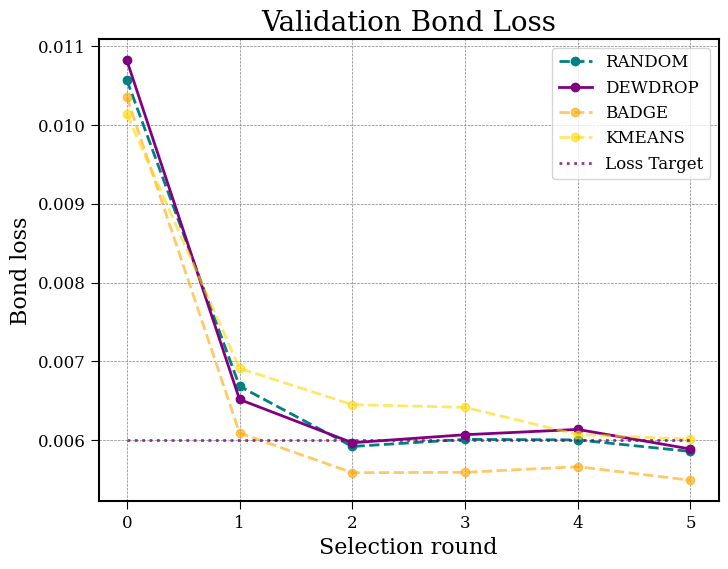

In [20]:
trial_num = 3
batch_num = 5 
batch_idx = 0
version_idx_dewdrop, version_idx_random, version_idx_badge, version_idx_kmeans = 4, 1, 1, 1
target_loss_column = 'val_loss_angle_final'
dewdropfp_template = "/mount/UDS-ActiveLearning-Equifold/model_logs/dewdrop/dewdrop_bs=100_batches={batch_idx}/v{version_idx_dewdrop}/metrics.csv"
randomfp_template = "/mount/UDS-ActiveLearning-Equifold/model_logs/random_selection/random_selection_batches={batch_idx}/v{version_idx_random}/metrics.csv"
badgefp_template = "/mount/UDS-ActiveLearning-Equifold/model_logs/badge/badge_bs=100_batches={batch_idx}/v{version_idx_badge}/metrics.csv"
kmeansfp_template = "/mount/UDS-ActiveLearning-Equifold/model_logs/kmeans/kmeans_bs=100_batches={batch_idx}/v{version_idx_badge}/metrics.csv"

dewdrop_trials, random_trials, badge_trials, kmeans_trials = [], [], [], []
for t in range(trial_num):
    batch_idx = 0
    dewdrop_trials.append([])
    random_trials.append([])
    badge_trials.append([])
    kmeans_trials.append([])
    for b in range(batch_num+1): 
        dewdropfp = dewdropfp_template.format(batch_idx=batch_idx, version_idx_dewdrop=version_idx_dewdrop)
        randomfp = randomfp_template.format(batch_idx=batch_idx, version_idx_random=version_idx_random)
        badgefp = badgefp_template.format(batch_idx=batch_idx, version_idx_badge=version_idx_badge)
        kmeansfp = kmeansfp_template.format(batch_idx=batch_idx, version_idx_badge=version_idx_badge)
        if os.path.exists(dewdropfp):
            dewdrop_trials[t].append(pd.read_csv(dewdropfp)[target_loss_column].dropna().to_list())
        if os.path.exists(randomfp): 
            random_trials[t].append(pd.read_csv(randomfp)[target_loss_column].dropna().to_list())
        if os.path.exists(badgefp): 
            badge_trials[t].append(pd.read_csv(badgefp)[target_loss_column].dropna().to_list())
        if os.path.exists(kmeansfp): 
            kmeans_trials[t].append(pd.read_csv(kmeansfp)[target_loss_column].dropna().to_list())
        batch_idx += 1
    version_idx_dewdrop += 1
    version_idx_random += 1
    version_idx_badge += 1
    version_idx_kmeans += 1

# get the min valloss from each trials
dewdrop_val_bond_losses = []
random_val_bond_losses = []
badge_val_bond_losses = []
kmeans_val_bond_losses = []
for dewdrop_t, random_t, badge_t, kmeans_t in zip(dewdrop_trials, random_trials, badge_trials, kmeans_trials):
    dewdrop_val_bond_losses.append([np.min(loss_b) for loss_b in dewdrop_t])
    random_val_bond_losses.append([np.min(loss_b) for loss_b in random_t])
    badge_val_bond_losses.append([np.min(loss_b) for loss_b in badge_t])
    kmeans_val_bond_losses.append([np.min(loss_b) for loss_b in kmeans_t])

max_dewdrop_batchnum = max([len(loss) for loss in dewdrop_val_bond_losses])
dewdrop_val_bond_losses_avg = []
for b in range(max_dewdrop_batchnum): 
    dewdrop_val_bond_losses_avg.append(np.mean([dewdrop_val_bond_losses[t][b] for t in range(trial_num) if b < len(dewdrop_val_bond_losses[t])]))
max_random_batchnum = max([len(loss) for loss in random_val_bond_losses])
random_val_bond_losses_avg = []
for b in range(max_random_batchnum): 
    random_val_bond_losses_avg.append(np.mean([random_val_bond_losses[t][b] for t in range(trial_num) if b < len(random_val_bond_losses[t])]))
max_badge_batchnum = max([len(loss) for loss in badge_val_bond_losses])
badge_val_bond_losses_avg = []
for b in range(max_badge_batchnum): 
    badge_val_bond_losses_avg.append(np.mean([badge_val_bond_losses[t][b] for t in range(trial_num) if b < len(badge_val_bond_losses[t])]))
max_kmeans_batchnum = max([len(loss) for loss in kmeans_val_bond_losses])
kmeans_val_bond_losses_avg = []
for b in range(max_kmeans_batchnum): 
    kmeans_val_bond_losses_avg.append(np.mean([kmeans_val_bond_losses[t][b] for t in range(trial_num) if b < len(kmeans_val_bond_losses[t])]))
    
plt.figure(figsize=(8, 6))
plt.title("Validation Bond Loss")
plt.xlabel("Selection round")
plt.ylabel("Bond loss")
# plot random 
plt.plot(random_val_bond_losses_avg, color="#008080", marker='o', linestyle='dashed', label='RANDOM')

# plot dewdrop
plt.plot(dewdrop_val_bond_losses_avg, color="purple", marker='o', label='DEWDROP')

# plot badge 
plt.plot(badge_val_bond_losses_avg, color='#FFA500', alpha=0.6, marker='o', linestyle='dashed', label='BADGE')

# plot kmeans 
plt.plot(kmeans_val_bond_losses_avg, color='#FFD700', alpha=0.6, marker='o', linestyle='dashed', label='KMEANS')

# plot horizontal loss threshold 
plt.hlines(y=0.006, xmin=0, xmax=5, colors='purple', alpha=0.8, linestyle='dotted', label="Loss Target")
plt.legend()
plt.savefig("graphs/compare_bond_loss.png")


In [21]:
# trial_num = 3
# batch_num = 5 
# batch_idx = 0
# version_idx_dewdrop, version_idx_random, version_idx_badge = 4, 1, 1
# target_loss_column = 'epoch'
# dewdropfp_template = "/mount/UDS-ActiveLearning-Equifold/model_logs/dewdrop/dewdrop_bs=100_batches={batch_idx}/v{version_idx_dewdrop}/metrics.csv"
# randomfp_template = "/mount/UDS-ActiveLearning-Equifold/model_logs/random_selection/random_selection_batches={batch_idx}/v{version_idx_random}/metrics.csv"
# badgefp_template = "/mount/UDS-ActiveLearning-Equifold/model_logs/badge/badge_bs=100_batches={batch_idx}/v{version_idx_badge}/metrics.csv"

# dewdrop_trials, random_trials, badge_trials = [], [], []
# for t in range(trial_num):
#     batch_idx = 0
#     dewdrop_trials.append([])
#     random_trials.append([])
#     badge_trials.append([])
#     for b in range(batch_num+1): 
#         dewdropfp = dewdropfp_template.format(batch_idx=batch_idx, version_idx_dewdrop=version_idx_dewdrop)
#         randomfp = randomfp_template.format(batch_idx=batch_idx, version_idx_random=version_idx_random)
#         badgefp = badgefp_template.format(batch_idx=batch_idx, version_idx_badge=version_idx_badge)
#         if os.path.exists(dewdropfp):
#             dewdrop_trials[t].append(pd.read_csv(dewdropfp)[target_loss_column].dropna().to_list())
#         if os.path.exists(randomfp): 
#             random_trials[t].append(pd.read_csv(randomfp)[target_loss_column].dropna().to_list())
#         if os.path.exists(badgefp): 
#             badge_trials[t].append(pd.read_csv(badgefp)[target_loss_column].dropna().to_list())
#         batch_idx += 1
#     version_idx_dewdrop += 1
#     version_idx_random += 1
#     version_idx_badge += 1
    
# # get the min valloss from each trials
# dewdrop_val_fape_losses = []
# random_val_fape_losses = []
# badge_val_fape_losses = []
# for dewdrop_t, random_t, badge_t in zip(dewdrop_trials, random_trials, badge_trials):
#     dewdrop_val_fape_losses.append([len(np.unique(loss_b)) for loss_b in dewdrop_t])
#     random_val_fape_losses.append([len(np.unique(loss_b)) for loss_b in random_t])
#     badge_val_fape_losses.append([len(np.unique(loss_b)) for loss_b in badge_t])

# max_dewdrop_batchnum = max([len(loss) for loss in dewdrop_val_fape_losses])
# dewdrop_val_fape_losses_avg = []
# for b in range(max_dewdrop_batchnum): 
#     dewdrop_val_fape_losses_avg.append(np.mean([dewdrop_val_fape_losses[t][b] for t in range(trial_num) if b < len(dewdrop_val_fape_losses[t])]))
# max_random_batchnum = max([len(loss) for loss in random_val_fape_losses])
# random_val_fape_losses_avg = []
# for b in range(max_random_batchnum): 
#     random_val_fape_losses_avg.append(np.mean([random_val_fape_losses[t][b] for t in range(trial_num) if b < len(random_val_fape_losses[t])]))
# max_badge_batchnum = max([len(loss) for loss in badge_val_fape_losses])
# badge_val_fape_losses_avg = []
# for b in range(max_badge_batchnum): 
#     badge_val_fape_losses_avg.append(np.mean([badge_val_fape_losses[t][b] for t in range(trial_num) if b < len(badge_val_fape_losses[t])]))

    
# plt.figure(figsize=(8, 6))
# plt.title("Number of Epochs to Convergence")
# plt.xlabel("Selection round")
# plt.ylabel("Epochs")
# # plot random 
# plt.plot(random_val_fape_losses_avg, color="grey", marker='o', linestyle='dashed', label='RANDOM')

# # plot dewdrop
# plt.plot(dewdrop_val_fape_losses_avg, color="purple", marker='o', label='DEWDROP')

# # plot badge 
# plt.plot(badge_val_fape_losses_avg, color='purple', alpha=0.6, marker='o', linestyle='dashed', label='BADGE')



# plt.legend()
# plt.savefig("graphs/epochs_til_convergence.png")



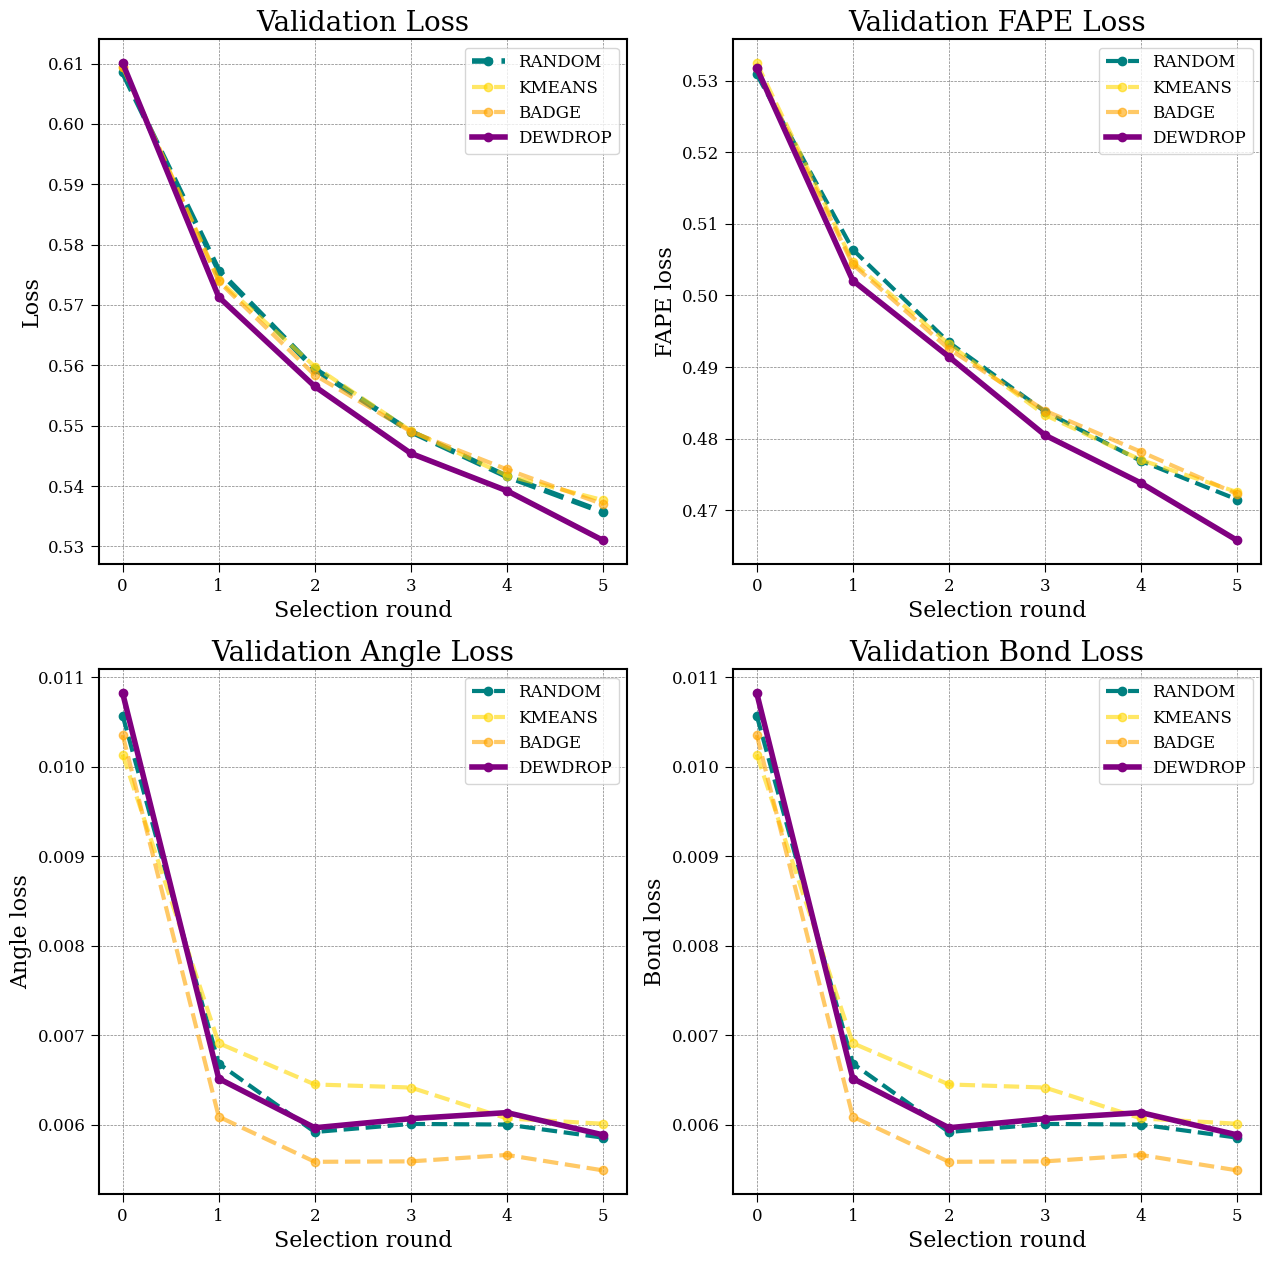

In [22]:
fig, axes = plt.subplots(2, 2, figsize=(15, 15))
axes[0, 0].set_title("Validation Loss")
axes[0, 0].set_xlabel("Selection round")
axes[0, 0].set_ylabel("Loss")
axes[0, 0].plot(random_val_losses_avg, color="#008080", marker='o', linestyle='dashed', label='RANDOM', linewidth=4)
axes[0, 0].plot(kmeans_val_losses_avg, color='#FFD700', alpha=0.6, marker='o', linestyle='dashed', label='KMEANS', linewidth=3)
axes[0, 0].plot(badge_val_losses_avg, color='#FFA500', alpha=0.6, marker='o', linestyle='dashed', label='BADGE', linewidth=3)
axes[0, 0].plot(dewdrop_val_losses_avg, color="purple", marker='o', label='DEWDROP', linewidth=4)
# axes[0, 0].hlines(y=0.545, xmin=0, xmax=5, colors='purple', alpha=0.8, linestyle='dotted', label="Loss Target", linewidth=3)
axes[0, 0].legend()


axes[0, 1].set_title("Validation FAPE Loss")
axes[0, 1].set_xlabel("Selection round")
axes[0, 1].set_ylabel("FAPE loss")
axes[0, 1].plot(random_val_fape_losses_avg, color="#008080", marker='o', linestyle='dashed', label='RANDOM', linewidth=3)
axes[0, 1].plot(kmeans_val_fape_losses_avg, color='#FFD700', alpha=0.6, marker='o', linestyle='dashed', label='KMEANS', linewidth=3)
axes[0, 1].plot(badge_val_fape_losses_avg, color='#FFA500', alpha=0.6, marker='o', linestyle='dashed', label='BADGE', linewidth=3)
axes[0, 1].plot(dewdrop_val_fape_losses_avg, color="purple", marker='o', label='DEWDROP', linewidth=4)
# axes[0, 1].hlines(y=0.48, xmin=0, xmax=5, colors='purple', alpha=0.8, linestyle='dotted', label="Loss Target", linewidth=3)
axes[0, 1].legend()


axes[1, 0].set_title("Validation Angle Loss")
axes[1, 0].set_xlabel("Selection round")
axes[1, 0].set_ylabel("Angle loss") 
axes[1, 0].plot(random_val_angle_losses_avg, color="#008080", marker='o', linestyle='dashed', label='RANDOM', linewidth=3)
axes[1, 0].plot(kmeans_val_angle_losses_avg, color='#FFD700', alpha=0.6, marker='o', linestyle='dashed', label='KMEANS', linewidth=3)
axes[1, 0].plot(badge_val_angle_losses_avg, color='#FFA500', alpha=0.6, marker='o', linestyle='dashed', label='BADGE', linewidth=3)
axes[1, 0].plot(dewdrop_val_angle_losses_avg, color="purple", marker='o', label='DEWDROP', linewidth=4)
# axes[1, 0].hlines(y=0.006, xmin=0, xmax=5, colors='purple', alpha=0.8, linestyle='dotted', label="Loss Target", linewidth=3)
axes[1, 0].legend()


axes[1, 1].set_title("Validation Bond Loss")
axes[1, 1].set_xlabel("Selection round")
axes[1, 1].set_ylabel("Bond loss") 
axes[1, 1].plot(random_val_bond_losses_avg, color="#008080", marker='o', linestyle='dashed', label='RANDOM', linewidth=3)
axes[1, 1].plot(kmeans_val_bond_losses_avg, color='#FFD700', alpha=0.6, marker='o', linestyle='dashed', label='KMEANS', linewidth=3)
axes[1, 1].plot(badge_val_bond_losses_avg, color='#FFA500', alpha=0.6, marker='o', linestyle='dashed', label='BADGE', linewidth=3)
axes[1, 1].plot(dewdrop_val_bond_losses_avg, color="purple", marker='o', label='DEWDROP', linewidth=4) 
# axes[1, 1].hlines(y=0.006, xmin=0, xmax=5, colors='purple', alpha=0.8, linestyle='dotted', label="Loss Target", linewidth=3)
axes[1, 1].legend()

plt.savefig("graphs/4in1_compare_loss.png")

In [23]:
random_val_losses_avg, kmeans_val_losses_avg, badge_val_losses_avg, dewdrop_val_losses_avg

([0.6085608249015432,
  0.5757024529961093,
  0.5593772704838564,
  0.5489948210566605,
  0.5415756388118022,
  0.5356652865799715],
 [0.6094795747509101,
  0.5740965794939391,
  0.5597894637982871,
  0.54913158067502,
  0.5417138256798796,
  0.5376414277914042],
 [0.6094120925521249,
  0.5738925546337522,
  0.5583672705819752,
  0.5490165611284379,
  0.5427383033078277,
  0.5369697834990722],
 [0.6100711923083666,
  0.5713140767834864,
  0.5564869670997424,
  0.5453981067756143,
  0.539198985204834,
  0.5309763627957572])

In [24]:
random_val_fape_losses_avg, kmeans_val_fape_losses_avg, badge_val_fape_losses_avg, dewdrop_val_fape_losses_avg

([0.5308701992034912,
  0.506399949391683,
  0.49344925085703534,
  0.48378802339235943,
  0.47688355048497516,
  0.4715094268321991],
 [0.5324432253837585,
  0.5046441555023193,
  0.4932053983211517,
  0.4833163022994995,
  0.4770271182060241,
  0.4725405871868133],
 [0.5317520697911581,
  0.5043396751085917,
  0.49252251784006756,
  0.48391813039779663,
  0.4781656364599864,
  0.4722806016604106],
 [0.5317433079083761,
  0.5020771423975626,
  0.4914439916610718,
  0.4804992079734802,
  0.4738009174664815,
  0.4658009111881256])

In [25]:
random_val_angle_losses_avg, kmeans_val_angle_losses_avg, badge_val_angle_losses_avg, dewdrop_val_angle_losses_avg

([0.010572383134181067,
  0.006682571763933166,
  0.005917668041139167,
  0.0060078837403007,
  0.006000847329689467,
  0.0058546528871279],
 [0.0101369814424351,
  0.0069105250017453,
  0.0064491632794998,
  0.0064148279329957,
  0.0060692479134132,
  0.0060101638053045],
 [0.010356293052111,
  0.0060887962973813,
  0.0055846573290174,
  0.0055894316227015324,
  0.0056612770901577,
  0.0054887084039314665],
 [0.010823250972626932,
  0.006514893128704134,
  0.005965235888048933,
  0.0060669797851449665,
  0.006134339740236367,
  0.0058855363183251])

In [26]:
random_val_bond_losses_avg, kmeans_val_bond_losses_avg, badge_val_bond_losses_avg, dewdrop_val_bond_losses_avg

([0.010572383134181067,
  0.006682571763933166,
  0.005917668041139167,
  0.0060078837403007,
  0.006000847329689467,
  0.0058546528871279],
 [0.0101369814424351,
  0.0069105250017453,
  0.0064491632794998,
  0.0064148279329957,
  0.0060692479134132,
  0.0060101638053045],
 [0.010356293052111,
  0.0060887962973813,
  0.0055846573290174,
  0.0055894316227015324,
  0.0056612770901577,
  0.0054887084039314665],
 [0.010823250972626932,
  0.006514893128704134,
  0.005965235888048933,
  0.0060669797851449665,
  0.006134339740236367,
  0.0058855363183251])

### DEWDROP selection: Protein-Protein Correlation vs Protein-Protein Distance
* We do this with a sample size of 1000 data points

In [27]:
# get embedding for dewdrop selection 
# calculate correlation (square matrix) 
# calculate distance (square matrix)
# sample 1000 indices (shared across both square matrices)
# plot scatter plot with those values 

In [3]:
import configparser
from argparse import ArgumentParser, ArgumentDefaultsHelpFormatter
import gzip
import json
import os
import subprocess
import time
from multiprocessing import Pool
import shutil

import numpy as np
import pandas as pd
import pytorch_lightning as pl
import torch
import pickle
from torch.utils.data import DataLoader
from tqdm import tqdm
from sklearn.metrics import pairwise_distances
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min

from data.equifold_process_input import data_process
from models import NN
from model_badge import NN as NN_grad
from openfold_light.residue_constants import restype_3to1, resname_to_idx
from refine import refine
from sequence_checks import number_sequences
from utils import compute_prediction_error, to_atom37
from utils_data import collate_fn, x_to_pdb
from align import align_ensemble

from alien.selection import EntropySelector, RandomSelector # input joint_entropy manually into _select
from alien.data import ObjectDataset # store the unlabeled dataset
from alien.stats import (joint_entropy_from_ensemble, 
                         joint_entropy_from_covariance, 
                         covariance_from_ensemble,  # use this to calculate joint entropy 
                         apply_pca) 
from alien.models import PytorchRegressor # predict ensemble 

import matplotlib.pyplot as plt 
# Font settings
plt.rcParams['font.size'] = 12                # Default font size for text
plt.rcParams['font.family'] = 'serif'         # Font family for text

# Figure settings
plt.rcParams['figure.figsize'] = (8, 6)       # Default figure size (width, height in inches)
plt.rcParams['figure.dpi'] = 100              # Resolution of the figure in dots per inch

# Axes settings
plt.rcParams['axes.grid'] = True              # Turn on/off gridlines by default
plt.rcParams['axes.titlesize'] = 20           # Font size of the plot titles
plt.rcParams['axes.labelsize'] = 16           # Font size of the x and y labels
plt.rcParams['axes.linewidth'] = 1.5          # Line width of the axes

# Tick settings
plt.rcParams['xtick.labelsize'] = 12          # Font size for x-axis tick labels
plt.rcParams['ytick.labelsize'] = 12          # Font size for y-axis tick labels
plt.rcParams['xtick.major.size'] = 6          # Size of major ticks on x-axis
plt.rcParams['ytick.major.size'] = 6          # Size of major ticks on y-axis

# Line settings
plt.rcParams['lines.linewidth'] = 2.0         # Line width for plot lines
plt.rcParams['lines.markersize'] = 6          # Marker size for plot markers

# Legend settings
plt.rcParams['legend.fontsize'] = 12          # Font size for legend text
plt.rcParams['legend.loc'] = 'best'           # Default location for legends

# Save settings
plt.rcParams['savefig.dpi'] = 300             # DPI for saved figures
plt.rcParams['savefig.bbox'] = 'tight'        # Adjust layout when saving figures

# Grid settings
plt.rcParams['grid.color'] = 'gray'           # Color of gridlines
plt.rcParams['grid.linestyle'] = '--'         # Line style for gridlines
plt.rcParams['grid.linewidth'] = 0.5          # Line width for gridlines



device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# load model
CONFIG = configparser.ConfigParser(interpolation=configparser.ExtendedInterpolation())
CONFIG.read("configs/config_recycle.ini")

model_path = CONFIG["inference"]["model_ckpt"]
config_path = CONFIG["inference"]["config_path"]
with open(config_path, "r") as f:
    config = json.load(f)

model = NN(**config)
checkpoint = torch.load(model_path, map_location="cpu")
try:
    model.load_state_dict(checkpoint["state_dict"])
except:
    model.load_state_dict(checkpoint)
model = model.to(device)
model.eval()

# load data
datafp_pickle = "/mount/UDS-ActiveLearning-Equifold/data/nanofold_input_ext_sabdab_curated_1700.pickle"
with open(datafp_pickle, 'rb') as f: 
    dataset = pickle.load(f)

# shared selection parameter 
selection_bs = 100
dataset_index = list(range(len(dataset))) # index sequences for data object retrieval 
restype_to_idx = {(restype_3to1[resname] if resname != 'UNK' else "U"): resname_to_idx[resname] for resname in resname_to_idx}
idx_to_restype = {v:k for k, v in restype_to_idx.items()}

"""Utility functions"""
# map residue types to onehot vectors
def seq2onehot(sequences):
    """Return: 3D np.array"""
    index = np.array([[restype_to_idx[restype] if restype != '-' else restype_to_idx['U'] for restype in seq] for seq in sequences], dtype=np.int8) 
    identity_matrix = np.eye(len(restype_to_idx))
    return np.stack([identity_matrix[idx] for idx in index])

def onehot2seq(onehot): 
    reduced = np.argmax(onehot, axis=-1)
    return np.array([[idx_to_restype[idx] for idx in seq] for seq in sequences])

def extract_embedding(dataset, indices, model): 
    """
    Pass data through the model and generate a embedding with constant size to be clustered.
    """
    embedding_ensemble = []
    dataloader = DataLoader(
        dataset, 
        batch_size=1, 
        drop_last=False, 
        shuffle=False,
        num_workers=0, 
        collate_fn=collate_fn, 
        pin_memory=True, 
    )
    model.eval() 
    for data in tqdm(dataloader, desc="Generate gradient ensembles"): 
        data = data.to(device)
        model.zero_grad()
        return_dict = model(data)
        s = return_dict['final_block_emb']
        s = s.to('cpu')
        embedding_ensemble.append(s.view(-1))
    return embedding_ensemble

def joint_entropy_from_ensemble_without_pca(
    preds,
    epsilon=None,
    rel_epsilon=1e-4,
    generate=True,
    ddof=1,
    block_size=None,
    pbar=False,
):
    return joint_entropy_from_covariance(
        covariance_from_ensemble(preds, generate=generate, ddof=ddof, block_size=block_size),
        epsilon=epsilon,
        rel_epsilon=rel_epsilon,
        generate=True,
        pbar=pbar,
    )

/tmp/ipykernel_697294/2084769002.py:92: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load(model_path, map_location="cpu")


In [62]:
# get embeddings 
embedding = extract_embedding(dataset, dataset_index, model)




































































































































































































































































































































































































































































 52%|█████▏    | 327/630 [1:15:18<1:09:46, 13.82s/it]

















































































































































































































































































































































































































































































































In [64]:
torch.save(embedding, "ensemble_cache/dataset_embedding.pt")

In [18]:
# get dewdrop selection indicies 
dewdrop_indices = np.load("ensemble_cache/dewdrop_selection_indices.npy")

In [63]:
# pad for distance caluclation 
maxlen = max(len(s) for s in embedding)
for si in range(len(embedding)): 
    p1d = (0, maxlen-len(embedding[si]))
    if p1d[1] != 0: 
        embedding[si] = torch.nn.functional.pad(embedding[si], p1d, 'constant', 0.0)
embedding = torch.stack(embedding).cpu().detach().numpy()
dewdrop_embedding = embedding[dewdrop_indices]

In [4]:
# generate prediction ensembles 
dropout_seeds = np.random.rand(32)
model_nn_alien = PytorchRegressor(
    model=model,
    batch_size=selection_bs,
    iterate_inputs=False,
    trainer='lightning',
    stack_outputs=False, 
    stack_samples='outer', 
)
full_ensembles = [] # store every ensemble, len(ensembles) == num_batches
loader = DataLoader(
    dataset, 
    batch_size=1, 
    drop_last=False, 
    shuffle=False,
    num_workers=0, 
    collate_fn=collate_fn, 
    pin_memory=-True, 
)
for x in tqdm(loader, desc="Process over batches..."): 
    x = x.to(device)
    full_ensemble = model_nn_alien.predict_samples(
        X=x,
        n=32,
        seeds=dropout_seeds,
        use_lightning=False,
        compute_loss=False, 
        return_struct=True,
    )
    full_ensemble = [full_ensemble]
    masks = [torch.all(torch.where(e == 0, 0, 1), dim=-1, keepdim=True) for e in full_ensemble]
    full_ensemble = [align_ensemble(e) for e in full_ensemble]
    full_ensemble = [e * mask for e, mask in zip(full_ensemble, masks)]
    full_ensemble = [apply_pca(e.view(32, -1), 32, sample_axis=0, top_variance=False) for e in full_ensemble]
    full_ensembles.extend(full_ensemble) 
full_ensembles = torch.stack(full_ensembles, dim=0)

Process over batches...: 100%|██████████| 1708/1708 [4:16:58<00:00,  9.03s/it]  


In [6]:
# save the full dataset ensemble 
torch.save(full_ensembles, "./ensemble_cache/dataset_ensemble_32.pt")
# load the full dataset ensemble
full_ensembles = torch.load("./ensemble_cache/dataset_ensemble_32.pt")


In [51]:
# calculate joint entropy (an itme's self entropy is just the corresponding diagonal)
jen = joint_entropy_from_ensemble_without_pca(
    preds=full_ensembles,
    epsilon=7e-3,
    block_size=50,
    pbar=False
)
dewdrop_jen = jen[dewdrop_indices, :]

In [43]:
# self entropy 
# self_entropies = []
# for ensemble in full_ensembles: 
#     self_covaraince = covariance_from_ensemble(ensemble, generate=True, ddof=1, block_size=None)
#     self_covariance = self_covaraince[None, None, :, :]
#     self_entropy = joint_entropy_from_covariance(self_covariance, epsilon=7e-3)
#     self_entropies.append(self_entropy.squeeze())
# self_entropies = torch.stack(self_entropies)

In [52]:
# jen.shape

(1708, 1708)

In [45]:
# dewdrop_self_entropies = self_entropies[dewdrop_indices, None]

In [101]:
# find mutual information 
dataset_mutualinfo = torch.empty(*jen.shape)
for i in range(jen.shape[0]): 
    for j in range(jen.shape[1]): 
        dataset_mutualinfo[i, j] = jen[i, i] + jen[j, j] - jen[i, j]

In [99]:
dewdrop_mutualinfo = dataset_mutualinfo[dewdrop_indices, :][:, dewdrop_indices]

In [56]:
mean_dataset_mutualinfo = dataset_mutualinfo.mean(1)

In [57]:
mean_dataset_mutualinfo

tensor([4.1204, 3.8208, 3.8531,  ..., 3.5179, 3.5741, 3.5366])

In [58]:
mean_dewdrop_mutualinfo = mean_dataset_mutualinfo[dewdrop_indices]

In [65]:
# calculate correlation 
def calculate_correlation_matrix(arr):
    # Ensure the tensor has zero mean along the embeddings dimension
    arr = arr - arr.mean(axis=1, keepdims=True)
    # Compute the covariance matrix
    cov_matrix = arr @ np.transpose(arr)
    # Normalize the covariance matrix to get the correlation matrix
    stddev = np.sqrt(np.diag(cov_matrix))
    correlation_matrix = cov_matrix / (stddev[:, None] * stddev[None, :])
    # Clip values to ensure the matrix is within the range [-1, 1]
    correlation_matrix = np.clip(correlation_matrix, -1, 1)
    return correlation_matrix

dewdrop_correlation = calculate_correlation_matrix(dewdrop_embedding)

In [66]:
# calculate distance 
def calculate_euclidean_distance_matrix(tensor):
    # Compute the pairwise squared differences
    # We can use the broadcasting trick for calculating pairwise distances
    diff = tensor[:, None, :] - tensor[None, :, :]
    # Calculate the squared Euclidean distance and then the square root
    distance_matrix = np.sqrt(np.sum(diff ** 2, axis=-1))
    return distance_matrix

dewdrop_distance = calculate_euclidean_distance_matrix(dewdrop_embedding)

In [38]:
# sample 400 points from this
# i_indices = np.random.choice(20, size=100)
# j_indices = np.random.choice(20, size=100)

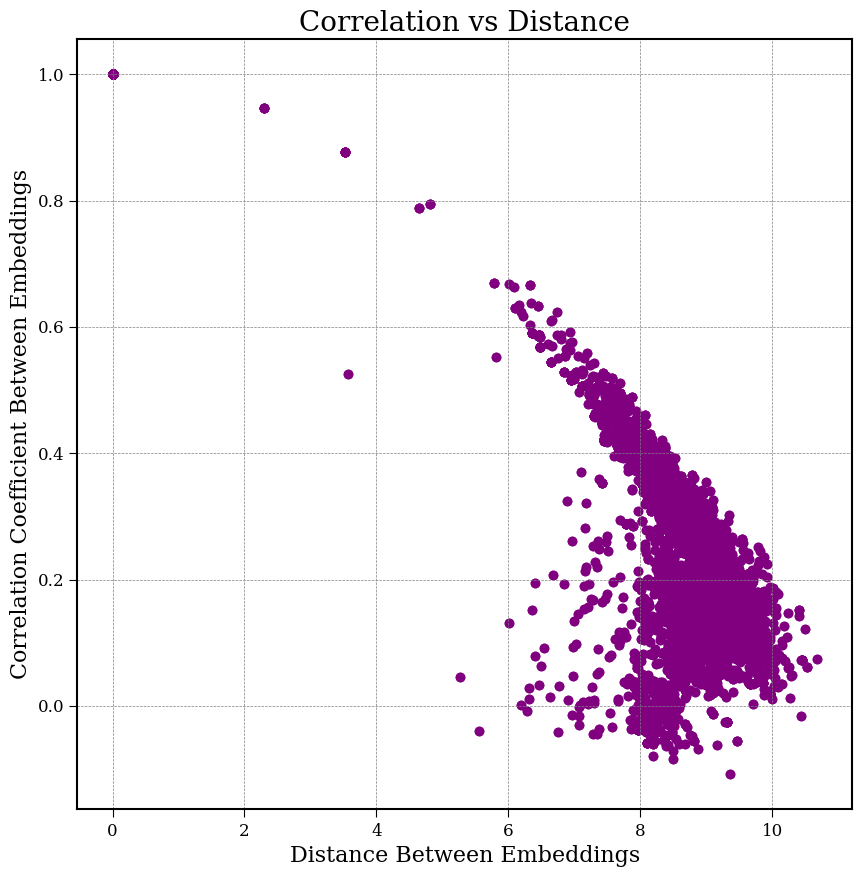

In [95]:
# plot the scatter plot 
plt.figure(figsize=(10, 10))
plt.title("Correlation vs Distance")
plt.xlabel("Distance Between Embeddings")
plt.ylabel("Correlation Coefficient Between Embeddings")
plt.scatter(dewdrop_distance, dewdrop_correlation, c="purple")
plt.show()

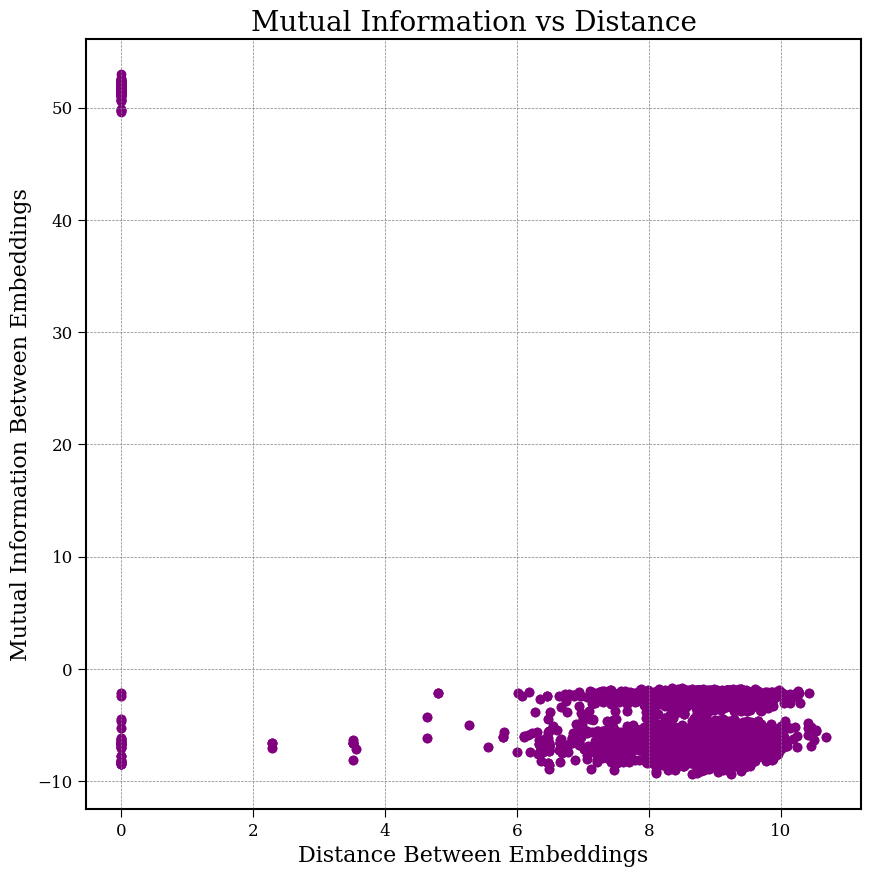

In [100]:
# plot the mutual information plot 
plt.figure(figsize=(10, 10))
plt.title("Mutual Information vs Distance")
plt.xlabel("Distance Between Embeddings")
plt.ylabel("Mutual Information Between Embeddings")
plt.scatter(dewdrop_distance, dewdrop_mutualinfo, c="purple")
plt.show()

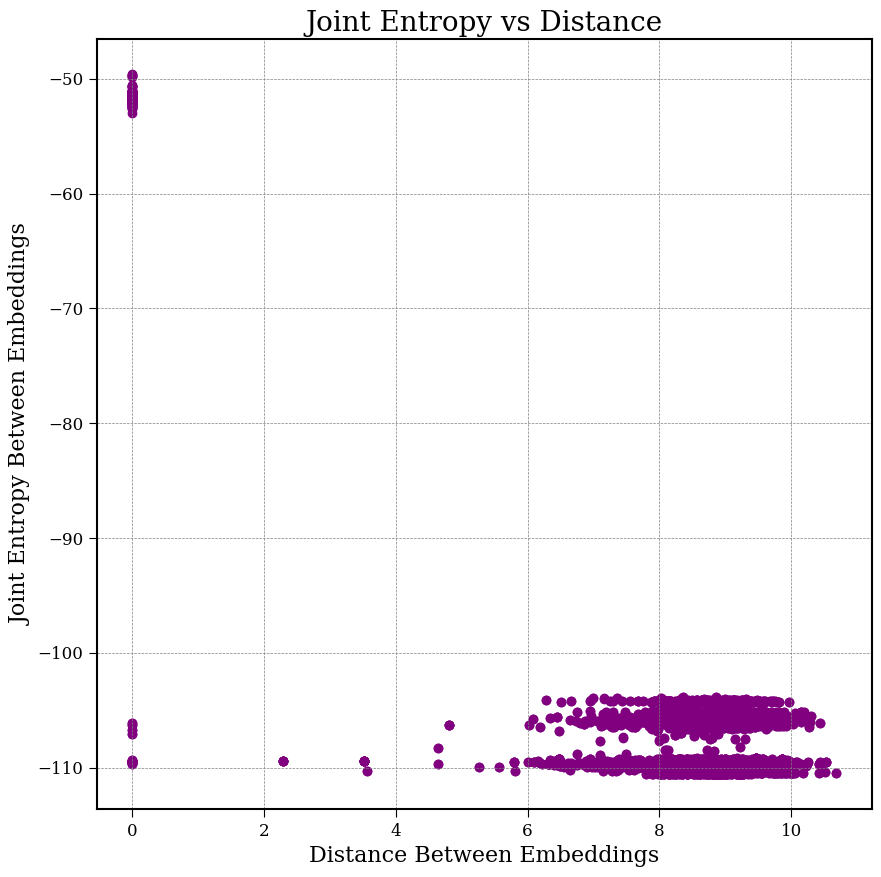

In [97]:
# dewdrop_jen

# plot the joint entropy plot 
plt.figure(figsize=(10, 10))
plt.title("Joint Entropy vs Distance")
plt.xlabel("Distance Between Embeddings")
plt.ylabel("Joint Entropy Between Embeddings")
plt.scatter(dewdrop_distance, dewdrop_jen[:, dewdrop_indices], c="purple")
plt.show()